In [7]:
import pandas as pd

train_df = pd.read_csv('/CrisisMMD_v2.0/crisismmd_datasplit_all/task_humanitarian_text_img_train.tsv', sep='\t')

train_df.head()


,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,california_wildfires,917791291823591425,917791291823591425_1,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,not_humanitarian,other_relevant_information,not_humanitarian,Negative
1,california_wildfires,917791291823591425,917791291823591425_0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,infrastructure_and_utility_damage,Negative
2,california_wildfires,917793137925459968,917793137925459968_0,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
3,california_wildfires,917793137925459968,917793137925459968_1,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
4,california_wildfires,917793137925459968,917793137925459968_2,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
train_df = pd.read_csv('/CrisisMMD_v2.0/crisismmd_datasplit_all/task_humanitarian_text_img_train.tsv', sep='\t')

# Load stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove @username and #hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and apply lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply cleaning function
train_df['cleaned_text'] = train_df['tweet_text'].apply(clean_text)

# Display cleaned text
print(train_df[['tweet_text', 'cleaned_text']].head())


                                          tweet_text  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
1  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
2  RT @KAKEnews: California wildfires destroy mor...   
3  RT @KAKEnews: California wildfires destroy mor...   
4  RT @KAKEnews: California wildfires destroy mor...   

                                        cleaned_text  
0  rt pls share weâ€™re capturing wildfire respon...  
1  rt pls share weâ€™re capturing wildfire respon...  
2        rt california wildfire destroy 50 structure  
3        rt california wildfire destroy 50 structure  
4        rt california wildfire destroy 50 structure  


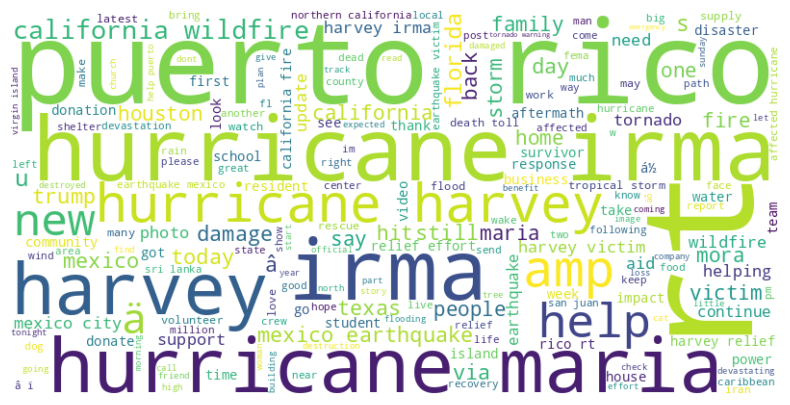

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all cleaned_text into a single string
all_text = ' '.join(train_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')  # Ensure the VADER lexicon is downloaded
sia = SentimentIntensityAnalyzer()

# Define a function to get VADER sentiment score
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Return compound score

# Define a function to get TextBlob sentiment score
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Return polarity score

# Apply sentiment analysis
train_df['vader_sentiment'] = train_df['cleaned_text'].apply(get_vader_sentiment)
train_df['textblob_sentiment'] = train_df['cleaned_text'].apply(get_textblob_sentiment)

# View DataFrame with added sentiment scores
print(train_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                        cleaned_text  vader_sentiment  \
0  rt pls share weâ€™re capturing wildfire respon...           0.3612   
1  rt pls share weâ€™re capturing wildfire respon...           0.3612   
2        rt california wildfire destroy 50 structure          -0.5423   
3        rt california wildfire destroy 50 structure          -0.5423   
4        rt california wildfire destroy 50 structure          -0.5423   

   textblob_sentiment  
0                 0.0  
1                 0.0  
2                -0.2  
3                -0.2  
4                -0.2  


In [ ]:
# Group by label_text and calculate the mean of VADER and TextBlob sentiment scores
grouped = train_df.groupby('label_text')[['vader_sentiment', 'textblob_sentiment']].mean()

# View the results
print(grouped)


                                        vader_sentiment  textblob_sentiment
label_text                                                                 
affected_individuals                          -0.064753           -0.027001
infrastructure_and_utility_damage             -0.231992           -0.008387
injured_or_dead_people                        -0.548041           -0.057600
missing_or_found_people                       -0.040766           -0.099469
not_humanitarian                               0.094371            0.072593
other_relevant_information                    -0.027290            0.025700
rescue_volunteering_or_donation_effort         0.221647            0.041259
vehicle_damage                                -0.180861            0.049674


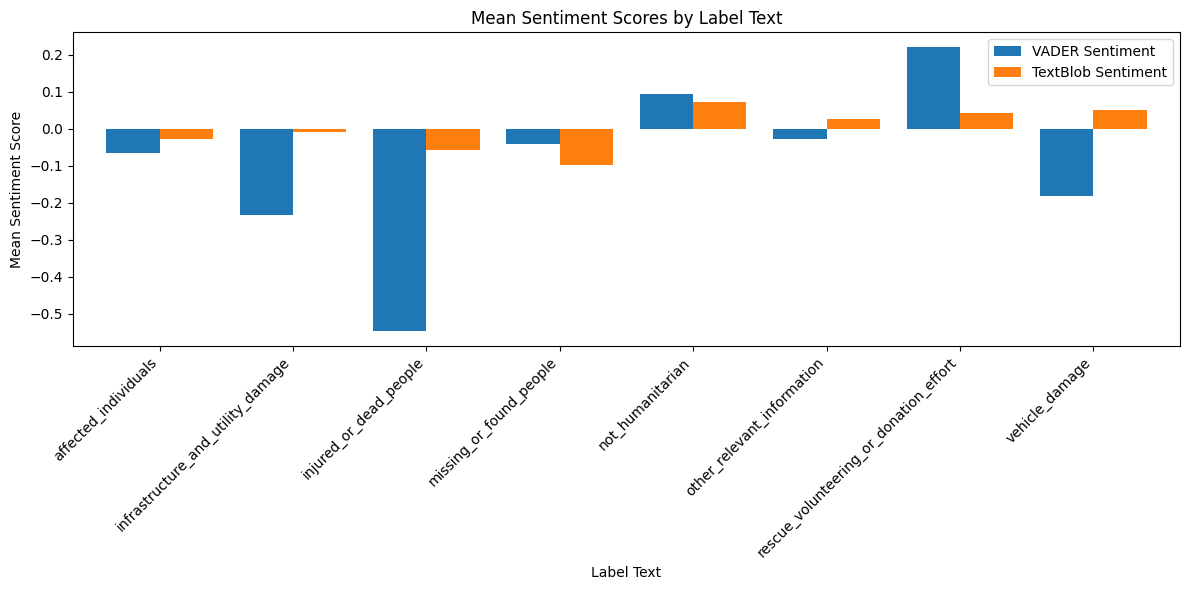

In [ ]:
import matplotlib.pyplot as plt

# Group by label_text and calculate mean sentiment scores
grouped = train_df.groupby('label_text')[['vader_sentiment', 'textblob_sentiment']].mean()

# Plot bar chart
grouped.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Sentiment Scores by Label Text')
plt.xlabel('Label Text')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.legend(['VADER Sentiment', 'TextBlob Sentiment'])

plt.tight_layout()  # Automatically adjusts subplot parameters to fit the figure area
plt.show()


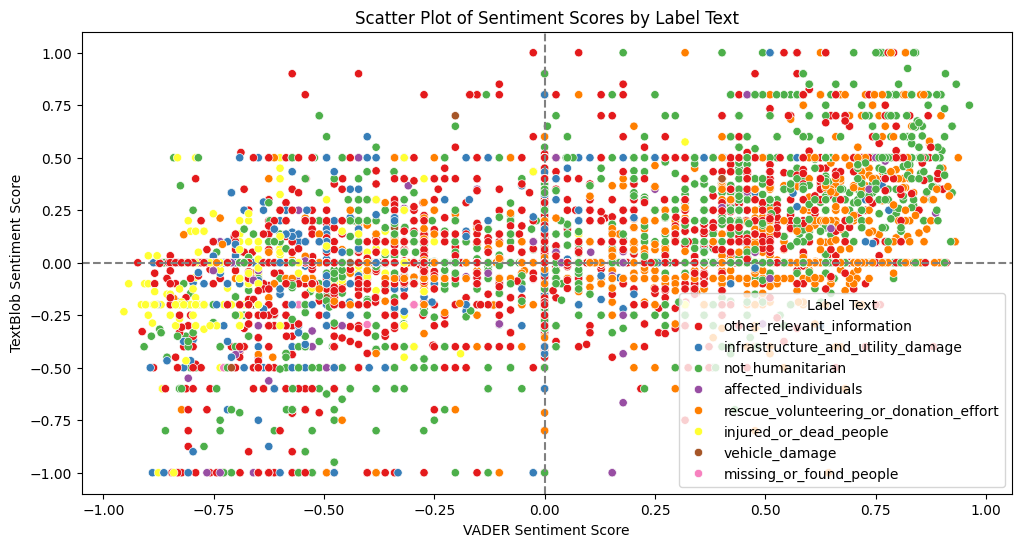

In [ ]:
import seaborn as sns
# Create a scatter plot
plt.figure(figsize=(12, 6))

sns.scatterplot(data=train_df, x='vader_sentiment', y='textblob_sentiment', hue='label_text', palette='Set1')

# Add title and labels
plt.title('Scatter Plot of Sentiment Scores by Label Text')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('TextBlob Sentiment Score')
plt.axhline(0, color='grey', linestyle='--')  # Add horizontal line at y=0
plt.axvline(0, color='grey', linestyle='--')  # Add vertical line at x=0

# Display legend
plt.legend(title='Label Text')
plt.show()


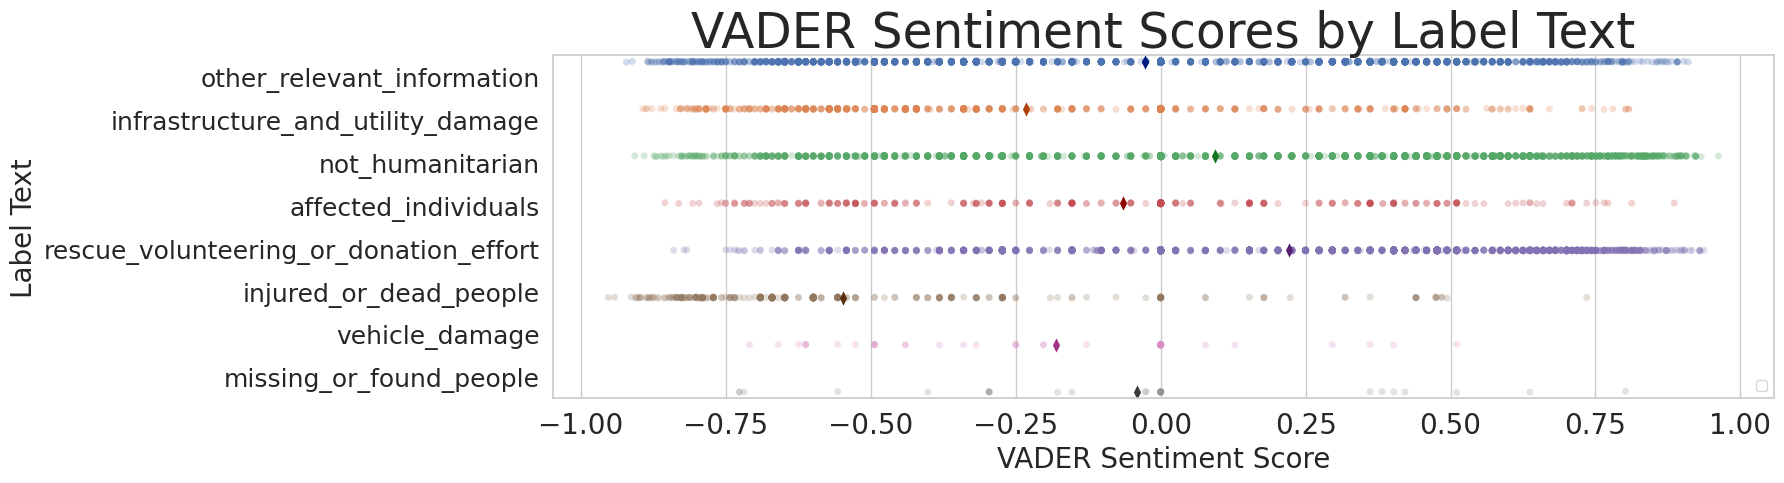

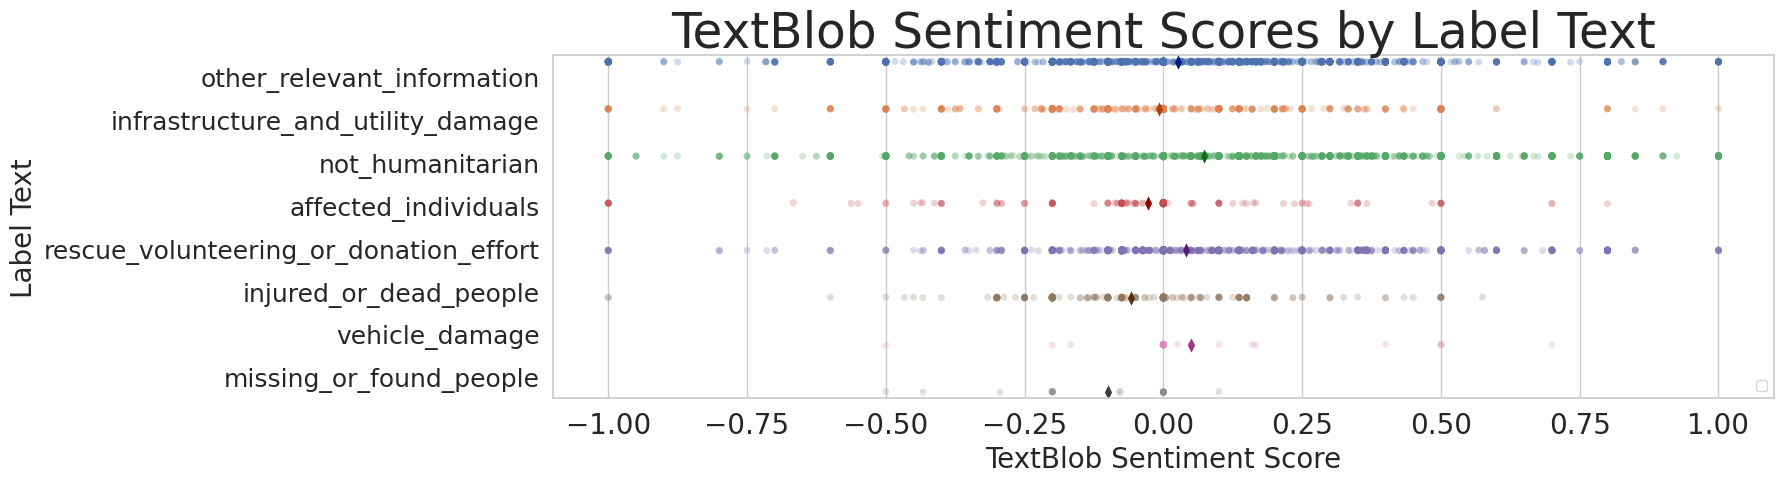

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# -------------------------- Plot 1: VADER Sentiment --------------------------
plt.figure(figsize=(18, 5))  # 减小图的高度

# Convert data to long format
vader_data = train_df.melt(id_vars="label_text", value_vars=["vader_sentiment"], var_name="measurement")

# Display scatter plot of each observation
sns.stripplot(
    data=vader_data, x="value", y="label_text", hue="label_text",
    dodge=True, alpha=.25, zorder=1
)

# Display conditional means
sns.pointplot(
    data=vader_data, x="value", y="label_text", hue="label_text",
    dodge=.8 - .8 / len(train_df['label_text'].unique()), palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none"
)

# Set plot title and labels with larger font
plt.title('VADER Sentiment Scores by Label Text', fontsize=35)
plt.xlabel('VADER Sentiment Score', fontsize=20)
plt.ylabel('Label Text', fontsize=20)

# Adjust tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc="lower right", ncol=3, fontsize=10, title_fontsize=12)

plt.tight_layout()  # Adjust plot layout
plt.show()

# -------------------------- Plot 2: TextBlob Sentiment --------------------------
plt.figure(figsize=(18, 5))  # 同样减小图的高度

# Convert data to long format
textblob_data = train_df.melt(id_vars="label_text", value_vars=["textblob_sentiment"], var_name="measurement")

# Display scatter plot of each observation
sns.stripplot(
    data=textblob_data, x="value", y="label_text", hue="label_text",
    dodge=True, alpha=.25, zorder=1
)

# Display conditional means
sns.pointplot(
    data=textblob_data, x="value", y="label_text", hue="label_text",
    dodge=.8 - .8 / len(train_df['label_text'].unique()), palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none"
)

# Set plot title and labels with larger font
plt.title('TextBlob Sentiment Scores by Label Text', fontsize=35)
plt.xlabel('TextBlob Sentiment Score', fontsize=20)
plt.ylabel('Label Text', fontsize=20)

# Adjust tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc="lower right", ncol=3, fontsize=10, title_fontsize=12)

plt.tight_layout()  # Adjust plot layout
plt.show()


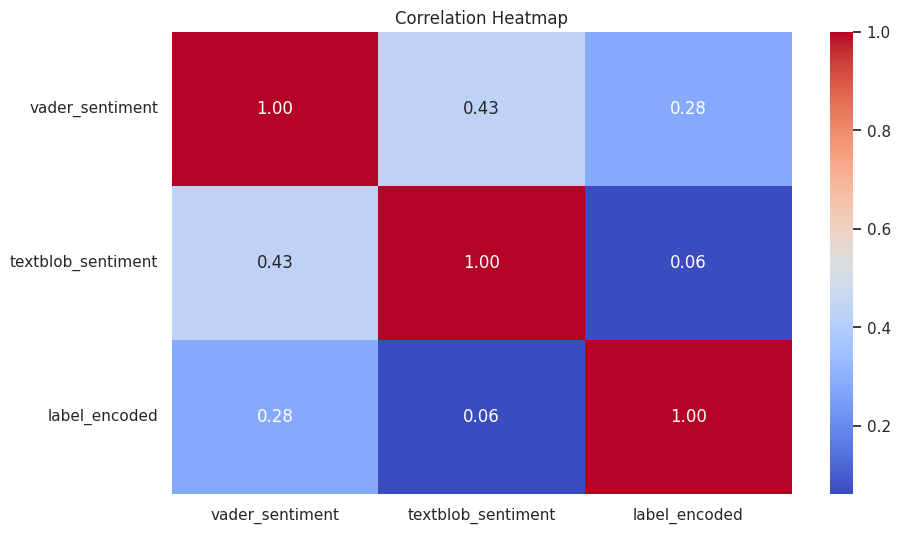

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert label_text to numerical encoding
train_df['label_encoded'] = train_df['label_text'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = train_df[['vader_sentiment', 'textblob_sentiment', 'label_encoded']].corr()

# Plot heatmap with rotated y-axis labels
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=correlation_matrix.columns, xticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.yticks(rotation=0)  # Rotate y-axis labels horizontally
plt.show()


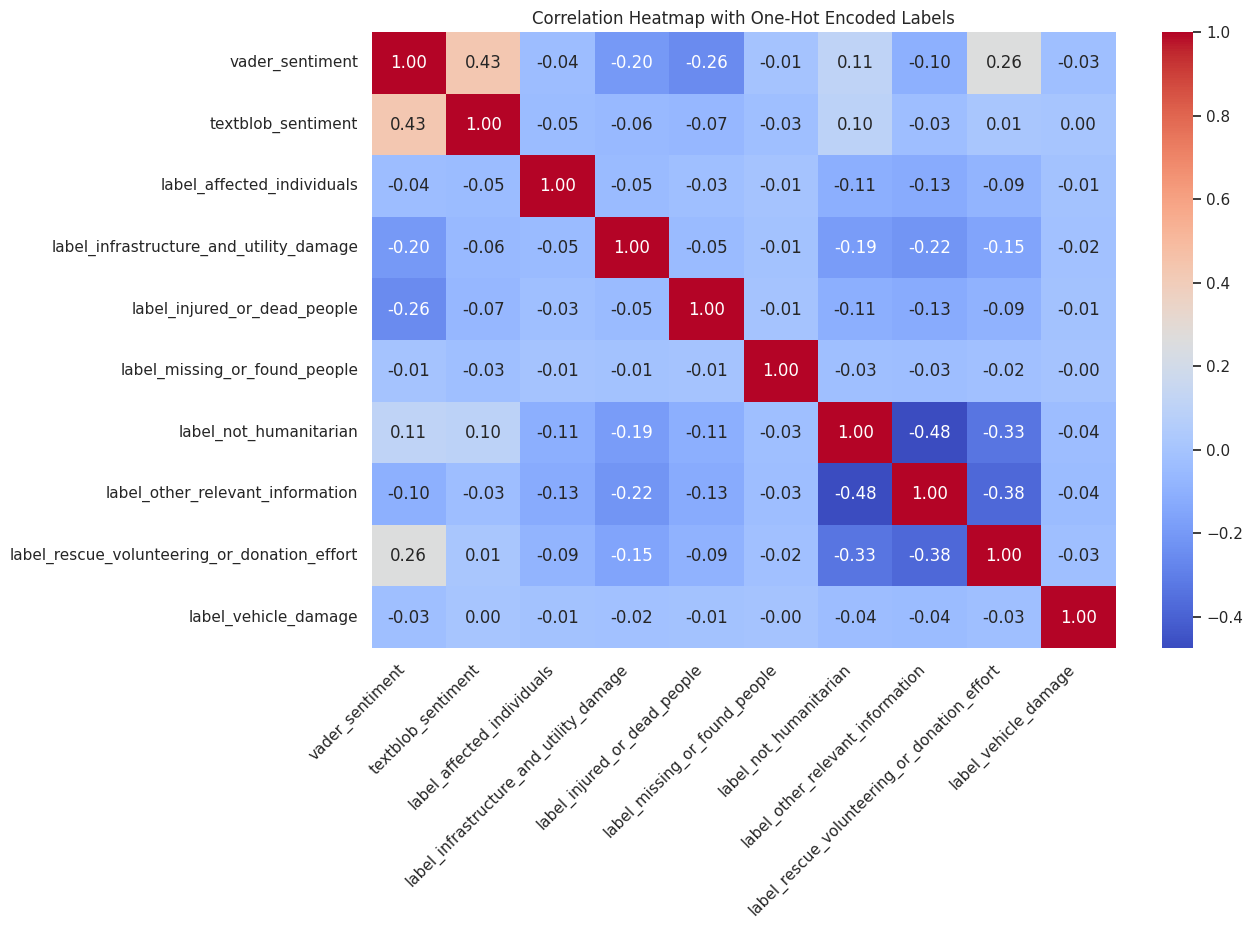

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert label_text to one-hot encoding
one_hot_labels = pd.get_dummies(train_df['label_text'], prefix='label')

# Add one-hot encoded columns to the DataFrame
train_df_encoded = pd.concat([train_df, one_hot_labels], axis=1)

# Calculate the correlation matrix including one-hot encoded columns
correlation_matrix = train_df_encoded[['vader_sentiment', 'textblob_sentiment'] + one_hot_labels.columns.tolist()].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # ha='right' 可以使标签靠右对齐
plt.title('Correlation Heatmap with One-Hot Encoded Labels')
plt.show()


In [ ]:
import pandas as pd
import glob

# File paths
file_paths = glob.glob('/CrisisMMD_v2.0/annotations/*.tsv')

# List to store combined DataFrame
combined_data = []

# Manually specify event types for each file
event_mapping = {
    'california_wildfires_final_data.tsv': 'wildfire',
    'hurricane_harvey_final_data.tsv': 'hurricane',
    'hurricane_irma_final_data.tsv': 'hurricane',
    'hurricane_maria_final_data.tsv': 'hurricane',
    'iraq_iran_earthquake_final_data.tsv': 'earthquake',
    'mexico_earthquake_final_data.tsv': 'earthquake',
    'srilanka_floods_final_data.tsv': 'flood'
}

# Read and combine data
for file in file_paths:
    # Extract event type
    event_type = event_mapping[file.split('/')[-1]]
    # Read the file
    data = pd.read_csv(file, sep='\t')
    # Add event type column
    data['event_type'] = event_type
    # Append to list
    combined_data.append(data)

# Combine all data
final_combined_data = pd.concat(combined_data, ignore_index=True)

# View the first few rows of the combined data
final_combined_data.head()


,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,event_type
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,wildfire
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,wildfire
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...,wildfire
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...,wildfire
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...,wildfire


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning
stop_words = set(stopwords.words('english'))  # Define stop words
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove @ usernames and # hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply cleaning function
final_combined_data['cleaned_text'] = final_combined_data['tweet_text'].apply(clean_text)

# 2. Sentiment Analysis
# Using VADER
nltk.download('vader_lexicon')  # Ensure VADER lexicon is downloaded
sia = SentimentIntensityAnalyzer()  # Initialize VADER sentiment analyzer
final_combined_data['vader_sentiment'] = final_combined_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Using TextBlob
final_combined_data['textblob_sentiment'] = final_combined_data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# https://seaborn.pydata.org/examples/jitter_stripplot.html
# https://seaborn.pydata.org/examples/large_distributions.html


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


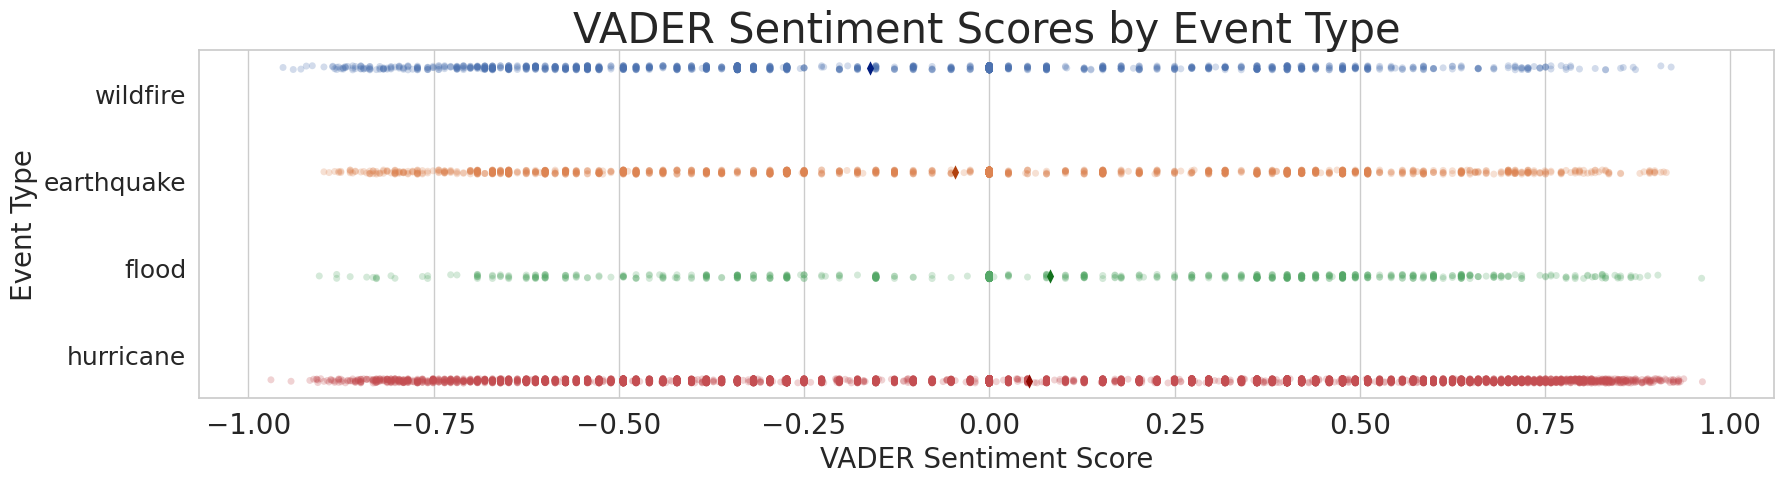

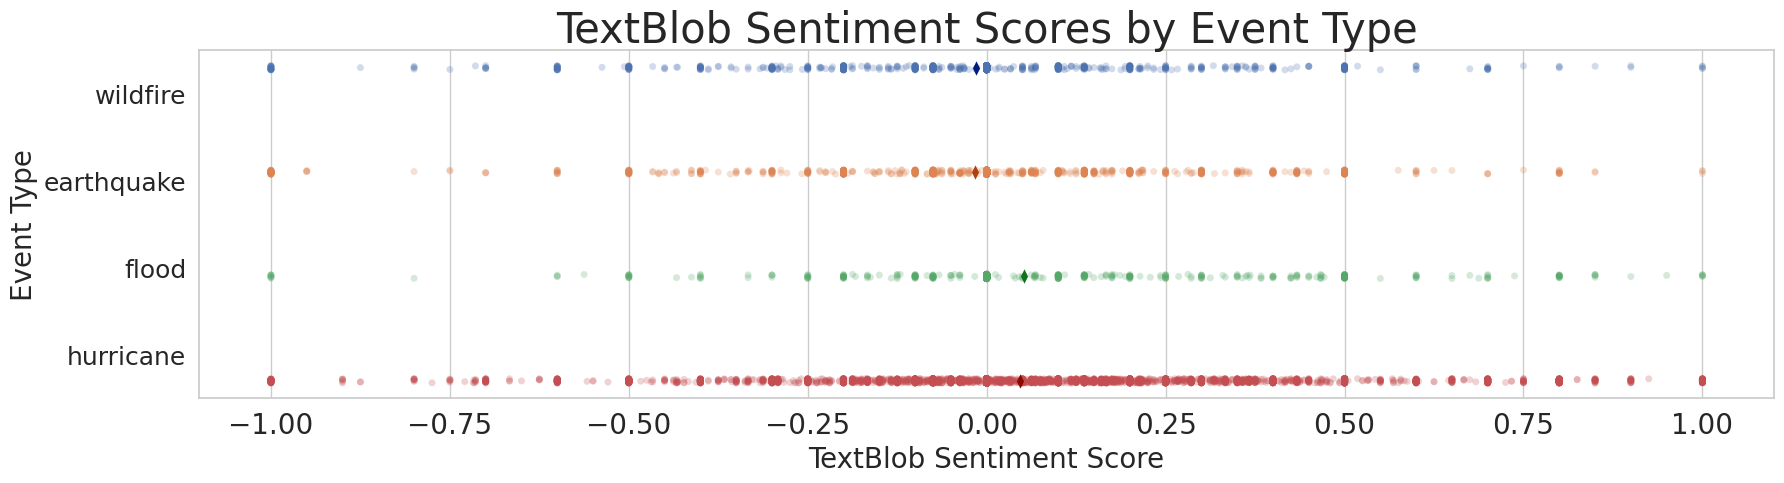

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------- Figure 1: VADER Sentiment --------------------------
plt.figure(figsize=(18, 5))  # Set figure width
sns.set_theme(style="whitegrid")

# Convert data to long format
vader_data = final_combined_data.melt(id_vars="event_type", value_vars=["vader_sentiment"], var_name="measurement")

# Display scatter plot for each observation
sns.stripplot(
    data=vader_data, x="value", y="event_type", hue="event_type",
    dodge=True, alpha=.25, zorder=1
)

# Display conditional means
sns.pointplot(
    data=vader_data, x="value", y="event_type", hue="event_type",
    dodge=.8 - .8 / len(final_combined_data['event_type'].unique()), palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none"
)

# Set plot title and labels
plt.title('VADER Sentiment Scores by Event Type', fontsize=30)
plt.xlabel('VADER Sentiment Score', fontsize=20)
plt.ylabel('Event Type', fontsize=20)


# Adjust tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

# Remove the legend
# plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # This line is removed
plt.tight_layout()  # Automatically adjust layout
plt.show()

# -------------------------- Figure 2: TextBlob Sentiment --------------------------
plt.figure(figsize=(18, 5))  # Set figure width
sns.set_theme(style="whitegrid")

# Convert data to long format
textblob_data = final_combined_data.melt(id_vars="event_type", value_vars=["textblob_sentiment"], var_name="measurement")

# Display scatter plot for each observation
sns.stripplot(
    data=textblob_data, x="value", y="event_type", hue="event_type",
    dodge=True, alpha=.25, zorder=1
)

# Display conditional means
sns.pointplot(
    data=textblob_data, x="value", y="event_type", hue="event_type",
    dodge=.8 - .8 / len(final_combined_data['event_type'].unique()), palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none"
)

# Set plot title and labels
plt.title('TextBlob Sentiment Scores by Event Type', fontsize=30)
plt.xlabel('TextBlob Sentiment Score', fontsize=20)
plt.ylabel('Event Type', fontsize=20)

# Adjust tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

plt.tight_layout()  # Automatically adjust layout
plt.show()


           vader_sentiment           textblob_sentiment          
                      mean       std               mean       std
event_type                                                       
earthquake       -0.046956  0.422752          -0.016216  0.253130
flood             0.081638  0.357404           0.052444  0.239373
hurricane         0.053065  0.375649           0.046648  0.227880
wildfire         -0.160418  0.393131          -0.014511  0.242923
Event Type: earthquake
VADER Average Sentiment Score: -0.04695624683864441
VADER Sentiment Score Standard Deviation: 0.4227523555249556
TextBlob Average Sentiment Score: -0.016216306420213857
TextBlob Sentiment Score Standard Deviation: 0.25313025704025066


Event Type: flood
VADER Average Sentiment Score: 0.08163776908023485
VADER Sentiment Score Standard Deviation: 0.357403665399849
TextBlob Average Sentiment Score: 0.05244362834382404
TextBlob Sentiment Score Standard Deviation: 0.23937285441728348


Event Type: hurricane
VADER A

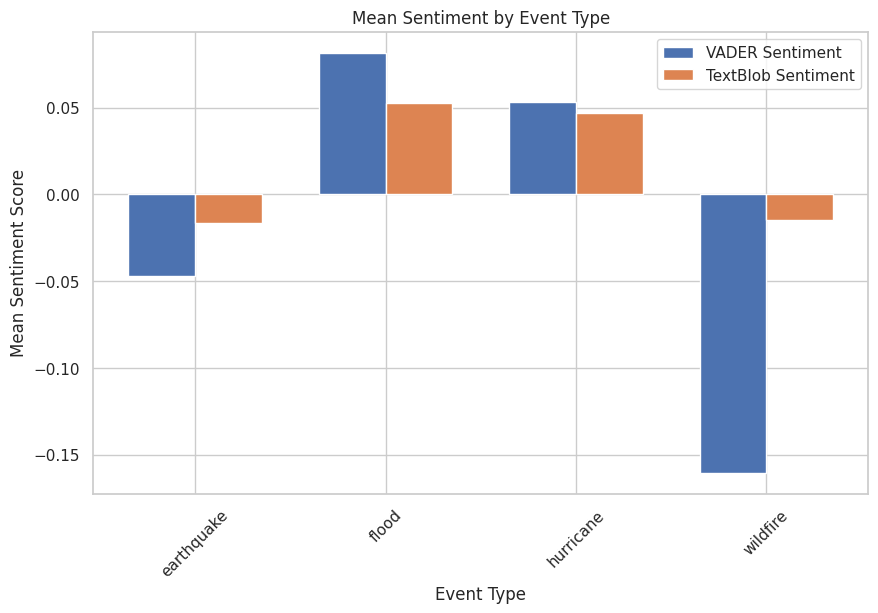

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the average sentiment scores and standard deviation for each event type
summary_stats = final_combined_data.groupby('event_type')[['vader_sentiment', 'textblob_sentiment']].agg(['mean', 'std'])
print(summary_stats)  # Print summary statistics

# Generate summary report
for event in summary_stats.index:  # Iterate over each event type
    print(f"Event Type: {event}")  # Print event type
    print(f"VADER Average Sentiment Score: {summary_stats.loc[event, ('vader_sentiment', 'mean')]}")  # Print VADER average sentiment score
    print(f"VADER Sentiment Score Standard Deviation: {summary_stats.loc[event, ('vader_sentiment', 'std')]}")  # Print VADER sentiment score standard deviation
    print(f"TextBlob Average Sentiment Score: {summary_stats.loc[event, ('textblob_sentiment', 'mean')]}")  # Print TextBlob average sentiment score
    print(f"TextBlob Sentiment Score Standard Deviation: {summary_stats.loc[event, ('textblob_sentiment', 'std')]}")  # Print TextBlob sentiment score standard deviation
    print("\n" + "="*50 + "\n")  # Print separator


# 计算每个事件类型的平均情感分数
summary_means = summary_stats.xs('mean', axis=1, level=1)

# 设置柱状图的宽度和位置
x = np.arange(len(summary_means.index))  # 每个事件类型的位置
width = 0.35  # 柱子宽度

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制 VADER 和 TextBlob 的柱状图
bars1 = ax.bar(x - width/2, summary_means['vader_sentiment'], width, label='VADER Sentiment')
bars2 = ax.bar(x + width/2, summary_means['textblob_sentiment'], width, label='TextBlob Sentiment')

# 添加标签和标题
ax.set_xlabel('Event Type')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment by Event Type')
ax.set_xticks(x)
ax.set_xticklabels(summary_means.index, rotation=45)
ax.legend()

plt.show()

